In [226]:
from neo4j_utility import *
from llm_extraction import *
from firecrawl_scraping import *
from utility import *
import os
from tqdm import tqdm
from dotenv import load_dotenv

import plotly.express as px
import plotly.graph_objects as go


In [227]:
description_lst = []
description_embedding_lst = []
product_name_lst = []
company_name_lst = []
processed_name_lst = []
url_lst = []

doc_list = os.listdir('extraction_output_v2')
for doc in doc_list:
    
    try:
        if doc in ['.DS_Store']:
            continue
        
        processed_name = doc.replace("_extraction.json", "")
        data = read_json_file(f'extraction_output_v2/{doc}')
        product_name_lst.append(data['summary_product_description']['name'])
        description_lst.append(data['summary_product_description']['description'])
        description_embedding_lst.append(data['summary_product_description']['description_embedding'])
        company_name_lst.append(data['name'])
        processed_name_lst.append(data['processed_company'])
        url_lst.append(data['url'])
    except Exception as e:
        print(f'Error at company {processed_name}: {e}')
    

'stacker_news_extraction.json', 'celebrity_agent_extraction.json'

In [228]:
doc_list = os.listdir('client_extraction_output')
for doc in doc_list:
    
    try:
        if doc in ['.DS_Store']:
            continue
        processed_name = doc.replace("_extraction.json", "")
        data = read_json_file(f'client_extraction_output/{doc}')
        
        if data['summary_product_description']:
            product_name_lst.append(data['summary_product_description']['name'])
            description_lst.append(data['summary_product_description']['description'])
            description_embedding_lst.append(data['summary_product_description']['description_embedding'])
            company_name_lst.append(data['name'])
            processed_name_lst.append(data['processed_company'])
            url_lst.append(data['url'])
            
        else:
            print(f'Company {processed_name} does not have summary product description.')
    except Exception as e:
        print(f'Error at company {processed_name}: {e}')

Company d_l__henricksen does not have summary product description.
Company ska_street_brewstillery does not have summary product description.
Company the_nature_conservancy does not have summary product description.
Company nfm_lending does not have summary product description.
Company pinnacle_cu does not have summary product description.
Company chevron does not have summary product description.
Company cru_group does not have summary product description.
Company zer0es_tv does not have summary product description.
Company giant_eagle does not have summary product description.
Company cbibanks does not have summary product description.
Company vodafone_com_tr does not have summary product description.
Company texas_pace_authority does not have summary product description.
Company fathom_realty_llc does not have summary product description.
Company verra does not have summary product description.
Company kraus_anderson does not have summary product description.
Company rubenstein_part

In [233]:
df_test = pd.DataFrame(data = {
    'description': description_lst,
    'description_embedding': description_embedding_lst,
    'product_name': product_name_lst,
    'company_name': company_name_lst,
    'processed_name': processed_name_lst,
    'url': url_lst
})

df_test.groupby('url').filter(lambda x: len(x) > 1)

description  \
39    Design, build, and scale AI-powered businesses...   
43    An AI-powered practice management tool providi...   
153   A comprehensive digital marketing platform pro...   
157   A comprehensive platform for accounting firms ...   
185   A comprehensive property rental management pla...   
189   A customizable branded mobile app designed for...   
231   Provides cloud-based solutions for creating, m...   
242   Provides AI-powered features including contact...   
258   Provides a comprehensive suite of tools for es...   
337   A comprehensive platform providing tools for r...   
393   A comprehensive SaaS platform that automates t...   
489   AI-driven financial crimes automation platform...   
516   Provides payroll services that enable faster a...   
605   A platform that connects developers, investors...   
612   A platform for designing and deploying busines...   
636   Provide verified insurance information through...   
659   AI video generation and AI avatars with featur...   
690   A comprehensive platform designed for property...   
694   A comprehensive AI-powered platform that provi...   
733   A platform that provides data-driven matching ...   
738   Provides a cloud-based software platform and c...   
777   Offers software solutions to buy and manage co...   
808   Provides a comprehensive platform for rental n...   
825   Providing lead generation, prospecting, and en...   
851   Provides a service to help domain experts desi...   
1044  Integrated risk and compliance management solu...   
1061  A comprehensive software solution that automat...   
1069  Automated digital advertising solutions to inc...   
1088  Practice management and client portal solution...   
1109  Software enhancing productivity and client man...   
1178  A comprehensive platform to automate onboardin...   
1358  Provides platforms and APIs for insurance data...   
1376  A suite of tools that includes business manage...   
1423  A data-driven marketplace offering tech-enable...   
1438  Comprehensive renewable energy platforms facil...   
1442  Providing high-quality appraisal services powe...   
1573  A comprehensive AI-driven platform providing r...   
1606  A payroll system that allows employers and fre...   
1612  Customizable mobile apps integrated with Squar...   
1707  Platform providing no-code paywall builder, su...   
1815  Customizable AI avatars and video generation t...   
1836  A platform for property and casualty agents to...   
1925  Provides a platform to buy and manage commerci...   
1938  AI-driven tools predict likely sellers, update...   

                                  description_embedding  \
39    [0.008912625722587109, -0.007098443806171417, ...   
43    [-0.01207746472209692, 0.017073171213269234, 0...   
153   [0.0022272553760558367, 0.01019427739083767, 0...   
157   [0.006581006105989218, 0.014533055946230888, 0...   
185   [-0.003423827001824975, 0.02758539281785488, 0...   
189   [-0.014236199669539928, -0.013775442726910114,...   
231   [0.01110185869038105, -0.0035295423585921526, ...   
242   [0.003308983752503991, -0.024557963013648987, ...   
258   [-0.007527479436248541, 0.03683372959494591, 0...   
337   [-0.02511092647910118, 0.033740781247615814, 0...   
393   [-0.02313358522951603, 0.006630186457186937, 0...   
489   [-0.028148740530014038, 0.006937987636774778, ...   
516   [-0.013117898255586624, -0.0023247639182955027...   
605   [-0.040244948118925095, -0.034558411687612534,...   
612   [-0.015054339542984962, -0.022754395380616188,...   
636   [-0.014605079777538776, -0.02475827932357788, ...   
659   [0.011427825316786766, 0.0036680104676634073, ...   
690   [-0.00180528883356601, 0.0032308243680745363, ...   
694   [-0.0038954620249569416, -0.022460218518972397...   
733   [-0.05871882662177086, -0.028691105544567108, ...   
738   [-0.006727150641381741, 0.010577559471130371, ...   
777   [-0.013007541187107563, 0.05092206969857216, 0...   
808   [-0.030254464596509933, 0

In [229]:
len(description_embedding_lst)

2074

In [230]:
len(product_name_lst)

2074

## Apply DBSCAN directly

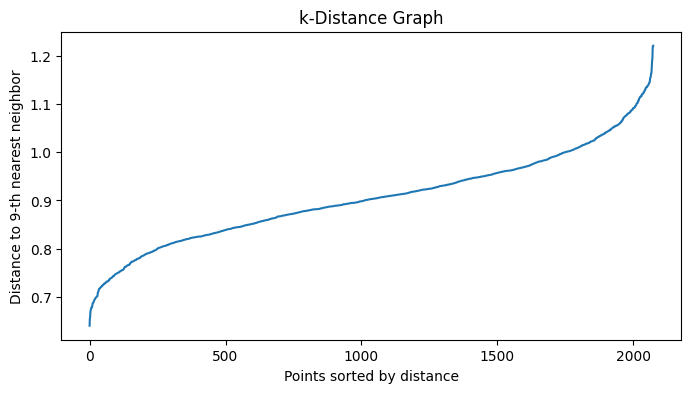

In [18]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# FIND THE OPTIMAL EPSILON VALUES

# Assuming `min_samples` is considered to be around 10 initially
min_samples = 10
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(description_embedding_lst)
distances, indices = nbrs.kneighbors(description_embedding_lst)

# Sort and plot distances to the (min_samples-1)th nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, min_samples-1]
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(min_samples-1))
plt.show()


In [19]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

perplexity_values = [10, 20, 30, 40, 50]  # Adjust based on your data size and complexity
epsilon_values = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7]  # Starting from the value found from k-distance
min_samples_values = [5, 10, 15, 20, 25]  # Sensible defaults based on data density

best_score = -1
best_params = {}

results = []

description_embedding_lst = np.array(description_embedding_lst)

for perplexity in perplexity_values:
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    transformed = tsne.fit_transform(description_embedding_lst)
    
    for eps in epsilon_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            clustering = DBSCAN(eps=eps, min_samples=min_samples)
            labels = clustering.fit_predict(transformed)
            
            if len(np.unique(labels)) > 1:  # Ensure there is more than 1 cluster
                score = silhouette_score(transformed, labels)
                results.append((perplexity, eps, min_samples, score))
                
                if score > best_score:
                    best_score = score
                    best_params = {'perplexity': perplexity, 'eps': eps, 'min_samples': min_samples}


In [20]:
print("Best silhouette score:", best_score)
print("Best parameters:", best_params)

# Optional: Convert results to DataFrame for easier handling
results_df = pd.DataFrame(results, columns=['Perplexity', 'Epsilon', 'Min Samples', 'Silhouette Score'])
print(results_df.sort_values(by='Silhouette Score', ascending=False).head())


Best silhouette score: 0.21272962
Best parameters: {'perplexity': 20, 'eps': 0.7, 'min_samples': 5}
    Perplexity  Epsilon  Min Samples  Silhouette Score
5           20      0.7            5          0.212730
30          50      0.5            5          0.086411
38          50      1.7            5          0.072372
28          40      1.7            5          0.051426
19          30      1.7            5          0.025142


In [21]:
from sklearn.cluster import DBSCAN

# Sample data: embeddings is an array of shape (8000, n_features)
# Replace with your actual data
# embeddings = np.array([...])

description_embedding_lst = np.array(description_embedding_lst)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=5)  # Adjust these parameters based on your data characteristics
clusters = dbscan.fit_predict(description_embedding_lst)

# Print cluster labels to see how many unique clusters there are
unique_clusters = np.unique(clusters)
print("Found clusters:", unique_clusters)

Found clusters: [-1  0  1  2  3  4  5  6  7]


In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA for 2D visualization
# pca = PCA(n_components=2)
# embeddings_2d = pca.fit_transform(description_embedding_lst)

# TSNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=20)
embeddings_2d = tsne.fit_transform(description_embedding_lst)

# t-SNE for 3D visualization
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(description_embedding_lst)

In [23]:
# Assuming `embeddings_2d` and `clusters` are already computed
# product_names should be a list or array containing the product names aligned with the embeddings
product_names = product_name_lst  # Replace with your actual product names

fig = px.scatter(
    x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
    color=clusters,
    labels={'color': 'Cluster'},
    hover_data=[product_names]
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='2D PCA of Product Embeddings', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()


In [24]:
fig = px.scatter_3d(
    x=embeddings_3d[:, 0], y=embeddings_3d[:, 1], z=embeddings_3d[:, 2],
    color=clusters,
    labels={'color': 'Cluster'},
    hover_data=[product_names]
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(title='3D t-SNE of Product Embeddings', margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [25]:
perplexity = 20
min_samples = 5
eps = 0.7

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
transformed = tsne.fit_transform(description_embedding_lst)

clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels = clustering.fit_predict(transformed)

unique_clusters = np.unique(clusters)
print("Found clusters:", unique_clusters)


Found clusters: [-1  0  1  2  3  4  5  6  7]


In [26]:
product_names = product_name_lst  # Replace with your actual product names

fig = px.scatter(
    x=transformed[:, 0], y=transformed[:, 1],
    color=clusters,
    labels={'color': 'Cluster'},
    hover_data=[product_names]
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='2D PCA of Product Embeddings', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()

In [44]:
df = pd.DataFrame(data = {
    'description': description_lst,
    'description_embedding': description_embedding_lst,
    'product_name': product_name_lst,
    'company_name': company_name_lst,
    'processed_name': processed_name_lst
})

In [45]:
df

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2069  A range of personal and business banking produ...   
2070  Artificial arms capable of near-full human ran...   
2071  Provides comprehensive HR and payroll solution...   
2072  Comprehensive financial and business services ...   
2073  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2069  [-0.0005363529198803008, 0.007281074300408363,...   
2070  [0.031287435442209244, 0.04793138802051544, -0...   
2071  [-0.019249044358730316, 0.000286013848381117, ...   
2072  [-0.015923814848065376, 0.02055956795811653, 0...   
2073  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2069  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2070                              AI-powered bionic arm             None   
2071                            HR and Payroll Software           Paycom   
2072                    Financial and Business Services  Cleveland Group   
2073                  Comprehensive Technology Platform      Futureverse   

       processed_name  
0              hearro  
1               raken  
2             crunch_  
3         crowdbureau  
4               yayem  
...               ...  
2069    starling_bank  
2070       atom_limbs  
2071           paycom  
2072  cleveland_group  
2073      futureverse  

[2074 rows x 5 columns]

In [46]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'description_embedding' contains lists or arrays of embeddings
embeddings = np.vstack(df['description_embedding'])

# Initialize lists to store results
results = []

# Iterate over a range of hyperparameters
for perplexity in [10, 20, 30, 40, 50]:  # Adjust based on your data size and complexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)
    
    for eps in [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]:  # Adjust based on k-distance graph
        for min_samples in [5, 10, 15, 20]:  # Sensible defaults based on data density
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(tsne_results)
            
            if len(np.unique(labels)) > 1:  # Ensure there is more than 1 cluster
                score = silhouette_score(tsne_results, labels)
                results.append({
                    'perplexity': perplexity,
                    'epsilon': eps,
                    'min_samples': min_samples,
                    'silhouette_score': score
                })




In [49]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

print(best_params)
results_df


perplexity          20.00000
epsilon              0.70000
min_samples          5.00000
silhouette_score     0.21273
Name: 4, dtype: float64


perplexity  epsilon  min_samples  silhouette_score
0           10      0.9            5         -0.056615
1           10      1.1            5         -0.658891
2           10      1.3            5         -0.602797
3           10      1.5            5         -0.436649
4           20      0.7            5          0.212730
5           20      0.9            5         -0.621807
6           20      1.1            5         -0.619398
7           20      1.3            5         -0.451032
8           20      1.5            5         -0.218409
9           20      1.5           10         -0.226156
10          30      0.7            5         -0.359529
11          30      0.9            5         -0.682125
12          30      1.1            5         -0.571021
13          30      1.3            5         -0.309727
14          30      1.5            5         -0.105055
15          30      1.5           10         -0.506387
16          40      0.7            5         -0.584048
17          40      0.9            5         -0.651359
18          40      1.1            5         -0.471513
19          40      1.3            5         -0.230155
20          40      1.3           10         -0.089922
21          40      1.5            5         -0.088130
22          40      1.5           10         -0.547991
23          50      0.5            5          0.086411
24          50      0.7            5         -0.663410
25          50      0.9            5         -0.659513
26          50      1.1            5         -0.398877
27          50      1.3            5         -0.155954
28          50      1.3           10         -0.439052
29          50      1.5            5         -0.019618
30          50      1.5           10         -0.507591

In [51]:
# Final t-SNE and DBSCAN with best parameters
tsne = TSNE(n_components=2, perplexity=best_params['perplexity'], random_state=42)
final_tsne_results = tsne.fit_transform(embeddings)
final_dbscan = DBSCAN(eps=best_params['epsilon'], min_samples=int(best_params['min_samples']))
final_labels = final_dbscan.fit_predict(final_tsne_results)

# 2D Visualization
fig_2d = px.scatter(x=final_tsne_results[:, 0], y=final_tsne_results[:, 1], color=final_labels.astype(str),
                    hover_data=[df['product_name'], df['company_name']])
fig_2d.update_layout(title='2D t-SNE Visualization of Product Embeddings', xaxis_title='Component 1', yaxis_title='Component 2')
fig_2d.show()

# If you need 3D visualization, run t-SNE with n_components=3 and repeat DBSCAN & plotting

## HDBSCAN

In [8]:
import numpy as np
import hdbscan
from sklearn.decomposition import PCA
import plotly.express as px

# Generate sample data (replace this with your actual embeddings)
from sklearn.datasets import make_blobs

# Assuming `embeddings` is your array of text embeddings
# Assuming `product_names` is a list of names corresponding to these embeddings
product_names = df['product_name'] 

embeddings = df['description_embedding']


df = pd.DataFrame(data = {
    'description': description_lst,
    'description_embedding': description_embedding_lst,
    'product_name': product_name_lst,
    'company_name': company_name_lst,
    'processed_name': processed_name_lst
})

if isinstance(embeddings, list):
    embeddings = np.array([np.array(embed) for embed in embeddings])
elif isinstance(embeddings, pd.Series):
    embeddings = np.stack(embeddings.values)
    
# Check the shape to ensure it's 2D
print('Embeddings shape:', embeddings.shape)

Embeddings shape: (2074, 1536)


In [8]:


# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, gen_min_span_tree=True)
labels = clusterer.fit_predict(embeddings)

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings)

# Create a DataFrame for Plotly, including product names
df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels
df['Product Name'] = product_names  # Add product names to the DataFrame

# Visualization using Plotly
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster', color_continuous_scale=px.colors.qualitative.Plotly,
                 hover_data=['Product Name'],
                 title="HDBSCAN Clustering with PCA Reduction",
                 labels={"Cluster": "Cluster ID", "PCA1": "Principal Component 1", "PCA2": "Principal Component 2"})
fig.update_traces(marker=dict(size=8))
fig.show()


Embeddings shape: (2074, 1536)


In [8]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=3)  # Change n_components to 3 for 3D visualization
reduced_data = pca.fit_transform(embeddings)

# Create a DataFrame for Plotly
df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2', 'PCA3'])
df['Cluster'] = labels
df['Product Name'] = product_names  # Add product names to the DataFrame

# Visualization using Plotly in 3D
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_data=['Product Name'],
                    title="HDBSCAN Clustering with 3D PCA Reduction",
                    labels={"Cluster": "Cluster ID"},
                    color_continuous_scale=px.colors.qualitative.Plotly)
fig.update_traces(marker=dict(size=5))
fig.show()

HDBSCAN Clustering with TSNE for reduction

In [4]:
df = pd.DataFrame(data = {
    'description': description_lst,
    'description_embedding': description_embedding_lst,
    'product_name': product_name_lst,
    'company_name': company_name_lst,
    'processed_name': processed_name_lst
})

In [24]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import hdbscan
from sklearn.metrics import silhouette_score
import plotly.express as px

# Assuming embeddings and product_names are already defined
# Step 1: Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=3, perplexity=30, random_state=42)  # Experiment with these parameters
tsne_results = tsne.fit_transform(embeddings)

# Step 2: Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=10)
labels = clusterer.fit_predict(tsne_results)

# Step 3: Evaluate Clustering
if np.unique(labels).size > 1:  # Ensure we have more than one cluster
    score = silhouette_score(tsne_results, labels)
    print("Silhouette Score:", score)

# Step 4: Visualization
df = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2', 'Dim3'])
df['Cluster'] = labels
df['Product Name'] = product_names

fig = px.scatter_3d(df, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                    title="t-SNE and HDBSCAN Clustering",
                    labels={"Cluster": "Cluster ID"},
                    color_continuous_scale=px.colors.qualitative.Plotly)
fig.show()




Silhouette Score: -0.15827961


In [29]:
# Importantly HDBSCAN is noise aware – it has a notion of data samples that are not assigned to any cluster. 
# This is handled by assigning these samples the label -1. 


# Dimensionality reduction for 2D visualization
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results_2d = tsne_2d.fit_transform(embeddings)

# Dimensionality reduction for 3D visualization
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(embeddings)

# Create DataFrames for Plotly visualization
df_2d = pd.DataFrame(tsne_results_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = [str(i) for i in labels]
df_2d['Product Name'] = product_names

df_3d = pd.DataFrame(tsne_results_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_3d['Cluster'] = [str(i) for i in labels]
df_3d['Product Name'] = product_names


In [31]:
# 2D Visualization
fig_2d = px.scatter(df_2d, x='Dim1', y='Dim2', color='Cluster', hover_data=['Product Name'],
                    title="2D t-SNE Visualization of HDBSCAN Clusters",
                    labels={"Cluster": "Cluster ID"},
                    color_continuous_scale=px.colors.qualitative.Plotly)
fig_2d.show()

# 3D Visualization
fig_3d = px.scatter_3d(df_3d, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                       title="3D t-SNE Visualization of HDBSCAN Clusters",
                       labels={"Cluster": "Cluster ID"},
                       color_continuous_scale=px.colors.qualitative.Plotly)
fig_3d.show()


V3 HDBSCAN

In [10]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score

# Assuming `embeddings` and `product_names` are already defined
# Apply HDBSCAN directly to high-dimensional embeddings
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=10)
labels = clusterer.fit_predict(embeddings)

# Evaluate Clustering
if np.unique(labels).size > 1:
    score = silhouette_score(embeddings, labels)
    print("Silhouette Score:", score)


Silhouette Score: -0.03483987353336772


In [11]:
from sklearn.manifold import TSNE
import plotly.express as px

# Dimensionality reduction for 2D visualization
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results_2d = tsne_2d.fit_transform(embeddings)

# Dimensionality reduction for 3D visualization
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(embeddings)

# Create DataFrames for Plotly visualization
df_2d = pd.DataFrame(tsne_results_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = labels
df_2d['Product Name'] = product_names

df_3d = pd.DataFrame(tsne_results_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_3d['Cluster'] = labels
df_3d['Product Name'] = product_names


In [12]:
# 2D Visualization
fig_2d = px.scatter(df_2d, x='Dim1', y='Dim2', color='Cluster', hover_data=['Product Name'],
                    title="2D t-SNE Visualization of HDBSCAN Clusters",
                    labels={"Cluster": "Cluster ID"},
                    color_continuous_scale=px.colors.qualitative.Plotly)
fig_2d.show()

# 3D Visualization
fig_3d = px.scatter_3d(df_3d, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                       title="3D t-SNE Visualization of HDBSCAN Clusters",
                       labels={"Cluster": "Cluster ID"},
                       color_continuous_scale=px.colors.qualitative.Plotly)
fig_3d.show()


## HDBSCAN with Umap

In [59]:
import umap
import plotly.express as px
import pandas as pd
import hdbscan

df = pd.DataFrame(data = {
    'description': description_lst,
    'description_embedding': description_embedding_lst,
    'product_name': product_name_lst,
    'company_name': company_name_lst,
    'processed_name': processed_name_lst,
    'url': url_lst
})



In [7]:

# Load your embeddings
embeddings = df['description_embedding']
product_names = df['product_name']

if isinstance(embeddings, list):
    embeddings = np.array([np.array(embed) for embed in embeddings])
elif isinstance(embeddings, pd.Series):
    embeddings = np.stack(embeddings.values)
    
# Check the shape to ensure it's 2D
print('Embeddings shape:', embeddings.shape)

# Reduce dimensionality for visualization
umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_3d = umap.UMAP(n_components=3, random_state=42)

embeddings_2d = umap_2d.fit_transform(embeddings)
embeddings_3d = umap_3d.fit_transform(embeddings)

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, cluster_selection_epsilon=0.01)
cluster_labels = clusterer.fit_predict(embeddings)

df_2d = pd.DataFrame(embeddings_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = [str(i) for i in cluster_labels]
df_2d['Product Name'] = product_names

df_3d = pd.DataFrame(embeddings_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_3d['Cluster'] = [str(i) for i in cluster_labels]
df_3d['Product Name'] = product_names




Embeddings shape: (2074, 1536)


/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [35]:
# 2D Visualization
fig_2d = px.scatter(df_2d, x='Dim1', y='Dim2', color='Cluster', hover_data=['Product Name'],
                    title="2D t-SNE Visualization of HDBSCAN Clusters",
                    labels={"Cluster": "Cluster ID"})
fig_2d.show()

# 3D Visualization
fig_3d = px.scatter_3d(df_3d, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                       title="3D t-SNE Visualization of HDBSCAN Clusters",
                       labels={"Cluster": "Cluster ID"})
fig_3d.show()


In [8]:

umap_model = umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Load your embeddings
embeddings = df['description_embedding']
product_names = df['product_name']

if isinstance(embeddings, list):
    embeddings = np.array([np.array(embed) for embed in embeddings])
elif isinstance(embeddings, pd.Series):
    embeddings = np.stack(embeddings.values)
    
# Check the shape to ensure it's 2D
print('Embeddings shape:', embeddings.shape)

# Reduce dimensionality for visualization
umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_3d = umap.UMAP(n_components=3, random_state=42)

embeddings_2d = umap_2d.fit_transform(embeddings)
embeddings_3d = umap_3d.fit_transform(embeddings)
embedding_umap = umap_model.fit_transform(embeddings)

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, cluster_selection_epsilon=0.01)
cluster_labels = clusterer.fit_predict(embedding_umap)

df_2d = pd.DataFrame(embeddings_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = [str(i) for i in cluster_labels]
df_2d['Product Name'] = product_names

df_3d = pd.DataFrame(embeddings_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_3d['Cluster'] = [str(i) for i in cluster_labels]
df_3d['Product Name'] = product_names

Embeddings shape: (2074, 1536)


/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/chenkangan/Documents/UCL DSML/Thesis/project/ucl_project/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [9]:
# 2D Visualization
fig_2d = px.scatter(df_2d, x='Dim1', y='Dim2', color='Cluster', hover_data=['Product Name'],
                    title="2D t-SNE Visualization of HDBSCAN Clusters",
                    labels={"Cluster": "Cluster ID"})
fig_2d.show()

# 3D Visualization
fig_3d = px.scatter_3d(df_3d, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                       title="3D t-SNE Visualization of HDBSCAN Clusters",
                       labels={"Cluster": "Cluster ID"})
fig_3d.show()


In [11]:
df_3d

Dim1      Dim2      Dim3 Cluster  \
0     13.246061  2.091884  7.568130      22   
1     12.960780  1.009110  9.138019      21   
2     12.478426  3.188426  5.951115      18   
3     11.331470  3.674750  9.171335      14   
4     11.909143  4.302882  8.621971      -1   
...         ...       ...       ...     ...   
2069   9.197405  4.299240  7.885406      16   
2070  12.455660  1.931040  8.558749      -1   
2071  11.848054  1.439910  5.772362      11   
2072  12.363731  3.585556  5.774642      18   
2073  13.385530  1.462512  7.893492      22   

                                           Product Name  
0                       Blockchain-Powered Phone System  
1     Construction Management and Production Trackin...  
2                            Online Accounting Services  
3                 Index and Finance Technology Platform  
4                  Global Community and Travel Platform  
...                                                 ...  
2069  Bank Accounts, Savings, Loans, and Banking Ser...  
2070                              AI-powered bionic arm  
2071                            HR and Payroll Software  
2072                    Financial and Business Services  
2073                  Comprehensive Technology Platform  

[2074 rows x 5 columns]

## BertTopic

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

# Assume `embeddings` is your precomputed embeddings array.
# Load your embeddings
embeddings = df['description_embedding']
product_names = df['product_name']
documents = df['description']

if isinstance(embeddings, list):
    embeddings = np.array([np.array(embed) for embed in embeddings])
elif isinstance(embeddings, pd.Series):
    embeddings = np.stack(embeddings.values)

if isinstance(documents, list):
    documents = np.array([np.array(doc) for doc in documents])
elif isinstance(documents, pd.Series):
    documents = np.stack(documents.values)


# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# # Step 6 - (Optional) Fine-tune topic representations with a `bertopic.representation` model
# representation_model = KeyBERTInspired()
import openai
from bertopic.representation import OpenAI

# Fine-tune topic representations with GPT
client = openai.OpenAI(api_key=os.getenv('OPENAI_KEY'))
representation_model = OpenAI(client, model="gpt-4o", chat=True)
topic_model = BERTopic(representation_model=representation_model)

# Initialize BERTopic without the embedding model
topic_model = BERTopic(
    umap_model=umap_model,                    # Step 2 - Reduce dimensionality
    hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
    vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
    ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
    representation_model=representation_model
    
)
# representation_model=representation_model # Step 6 - (Optional) Fine-tune topic representations

# Fit the topic model with the precomputed embeddings
# Here, `documents` is the list of original text documents that correspond to your embeddings
topics, probabilities = topic_model.fit_transform(documents, embeddings)


In [183]:
# df_topic = topic_model.get_topic_info()
df_topic = pd.read_csv('topic_extraction_detailed.csv')
# df_topic.to_csv('topic_extraction_detailed.csv', index = False)

In [185]:
df_topic

Topic  Count                                               Name  \
0      -1    562  -1_Comprehensive Financial and Business Manage...   
1       0    118  0_Comprehensive Tax, Accounting, and Advisory ...   
2       1    113     1_Comprehensive Banking and Financial Services   
3       2    105  2_Comprehensive Payment and Business Managemen...   
4       3     91  3_Comprehensive Construction and Engineering S...   
5       4     83  4_AI-Powered Risk and Compliance Management in...   
6       5     82  5_Comprehensive Financial and Investment Data ...   
7       6     64  6_Decentralized Platforms for Digital Content ...   
8       7     64  7_Tailored Investment and Capital Management S...   
9       8     58  8_Comprehensive Property Management Software S...   
10      9     52           9_Comprehensive HR and Payroll Solutions   
11     10     51  10_commercial real estate services and investm...   
12     11     51  11_Real Estate Marketing and Management Platforms   
13     12     46  12_Variety of Premium Food and Beverage Option...   
14     13     44  13_Property and Casualty Insurance Data Manage...   
15     14     41  14_Comprehensive IT and Security Solutions for...   
16     15     40  15_Comprehensive Insurance Solutions for Busin...   
17     16     38  16_Comprehensive Carbon and ESG Management Sol...   
18     17     37     17_Property Data Analytics and Valuation Tools   
19     18     36      18_Comprehensive Health and Wellness Services   
20     19     35        19_Construction Project Management Software   
21     20     35  20_Comprehensive Real Estate Services and Expe...   
22     21     35  21_Modern Sustainable Fashion and Comfortable ...   
23     22     30  22_Commercial and Multifamily Real Estate Fina...   
24     23     26  23_Automated Mortgage and Loan Origination Pla...   
25     24     25  24_Luxury Travel and Vacation Rentals with Per...   
26     25     24   25_Vacation Rental and Hotel Management Platform   
27     26     19  26_Renewable and Sustainable Energy Solutions ...   
28     27     18  27_Comprehensive Fundraising and Grant Managem...   
29     28     18  28_Affordable, Community-Focused Housing and S...   
30     29     18  29_Comprehensive Customizable Retirement Plans...   
31     30     15  30_Comprehensive Wealth and Financial Planning...   

                                       Representation  \
0   ['Comprehensive Financial and Business Managem...   
1   ['Comprehensive Tax, Accounting, and Advisory ...   
2    ['Comprehensive Banking and Financial Services']   
3   ['Comprehensive Payment and Business Managemen...   
4   ['Comprehensive Construction and Engineering S...   
5   ['AI-Powered Risk and Compliance Management in...   
6   ['Comprehensive Financial and Investment Data ...   
7   ['Decentralized Platforms for Digital Content ...   
8   ['Tailored Investment and Capital Management S...   
9   ['Comprehensive Property Management Software S...   
10         ['Comprehensive HR and Payroll Solutions']   
11  ['commercial real estate services and investme...   
12  ['Real Estate Marketing and Management Platfor...   
13  ['Variety of Premium Food and Beverage Options...   
14  ['Property and Casualty Insurance Data Managem...   
15  ['Comprehensive IT and Security Solutions for ...   
16  ['Comprehensive Insurance Solutions for Busine...   
17  ['Comprehensive Carbon and ESG Management Solu...   
18    ['Property Data Analytics and Valuation Tools']   
19     ['Comprehensive Health and Wellness Services']   
20       ['Construction Project Management Software']   
21  ['Comprehensive Real Estate Services and Exper...   
22  ['Modern Sustainable Fashion and Comfortable A...   
23  ['Commercial and Multifamily Real Estate Finan...   
24  ['Automated Mortgage and Loan Origination Plat...   
25  ['Luxury Travel and Vacation Rentals with Pers...   
26  ['Vacation Rental and Hotel Management Platform']   
27  ['Renewable and Sustainable Energy Solutions a...   
28  ['C

In [86]:
cluster_labels = list(df_topic['Name'])
cluster_label_map = {}

for label in cluster_labels:
    key = label.split('_')[0]
    cluster_label_map[key] = label

topics_detected = [cluster_label_map[str(i)] for i in topics]

In [87]:
umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_3d = umap.UMAP(n_components=3, random_state=42)

embeddings_2d = umap_2d.fit_transform(embeddings)
embeddings_3d = umap_3d.fit_transform(embeddings)

df_2d = pd.DataFrame(embeddings_2d, columns=['Dim1', 'Dim2'])
df_2d['Cluster'] = topics_detected
df_2d['Product Name'] = product_names

df_3d = pd.DataFrame(embeddings_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_3d['Cluster'] = topics_detected
df_3d['Product Name'] = product_names

In [89]:
df['Cluster'] = topics_detected
df.to_csv('company_clustering_result_detailed.csv', index = False)

In [95]:
# 2D Visualization
fig_2d = px.scatter(df_2d, x='Dim1', y='Dim2', color='Cluster', hover_data=['Product Name'],
                    title="2D t-SNE Visualization of HDBSCAN Clusters",
                    labels={"Cluster": "Cluster Name"})

fig_2d.show()

# 3D Visualization
fig_3d = px.scatter_3d(df_3d, x='Dim1', y='Dim2', z='Dim3', color='Cluster', hover_data=['Product Name'],
                       title="3D t-SNE Visualization of HDBSCAN Clusters",
                       labels={"Cluster": "Cluster Name"})
fig_3d.show()


In [117]:
df_read = pd.read_csv('company_clustering_result_detailed.csv')
len(df_read)

2074

In [116]:
df

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2069  A range of personal and business banking produ...   
2070  Artificial arms capable of near-full human ran...   
2071  Provides comprehensive HR and payroll solution...   
2072  Comprehensive financial and business services ...   
2073  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2069  [-0.0005363529198803008, 0.007281074300408363,...   
2070  [0.031287435442209244, 0.04793138802051544, -0...   
2071  [-0.019249044358730316, 0.000286013848381117, ...   
2072  [-0.015923814848065376, 0.02055956795811653, 0...   
2073  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2069  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2070                              AI-powered bionic arm             None   
2071                            HR and Payroll Software           Paycom   
2072                    Financial and Business Services  Cleveland Group   
2073                  Comprehensive Technology Platform      Futureverse   

       processed_name                             url  \
0              hearro          https://www.hearro.com   
1               raken        https://www.rakenapp.com   
2             crunch_        https://www.crunch.co.uk   
3         crowdbureau     https://www.crowdbureau.com   
4               yayem            https://www.yayem.co   
...               ...                             ...   
2069    starling_bank    https://www.starlingbank.com   
2070       atom_limbs       https://www.atomlimbs.com   
2071           paycom          https://www.paycom.com   
2072  cleveland_group  https://www.clevelandgroup.net   
2073      futureverse     https://www.futureverse.com   

                                                Cluster  
0     6_Decentralized Platforms for Digital Content ...  
1           19_Construction Project Management Software  
2     0_Comprehensive Tax, Accounting, and Advisory ...  
3     23_Automated Mortgage and Loan Origination Pla...  
4     -1_Comprehensive Financial and Business Manage...  
...                                                 ...  
2069     1_Comprehensive Banking and Financial Services  
2070  -1_Comprehensive Financial and Business Manage...  
2071           9_Comprehensive HR and Payroll Solutions  
2072  0_Comprehensive Tax, Accounting, and Advisory ...  
2073  6_Decentralized Platforms for Digital Content ...  

[2074 rows x 7 columns]

In [62]:
df_url = df[['processed_name', 'url']]
df_url

processed_name                             url
0              hearro          https://www.hearro.com
1               raken        https://www.rakenapp.com
2             crunch_        https://www.crunch.co.uk
3         crowdbureau     https://www.crowdbureau.com
4               yayem            https://www.yayem.co
...               ...                             ...
2069    starling_bank    https://www.starlingbank.com
2070       atom_limbs       https://www.atomlimbs.com
2071           paycom          https://www.paycom.com
2072  cleveland_group  https://www.clevelandgroup.net
2073      futureverse     https://www.futureverse.com

[2074 rows x 2 columns]

In [125]:
df_merge = df_read.merge(df_url, on = 'url', how = 'left')

In [126]:
df_merge

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2113  A range of personal and business banking produ...   
2114  Artificial arms capable of near-full human ran...   
2115  Provides comprehensive HR and payroll solution...   
2116  Comprehensive financial and business services ...   
2117  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2113  [-0.0005363529198803008, 0.007281074300408363,...   
2114  [0.031287435442209244, 0.04793138802051544, -0...   
2115  [-0.019249044358730316, 0.000286013848381117, ...   
2116  [-0.015923814848065376, 0.02055956795811653, 0...   
2117  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2113  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2114                              AI-powered bionic arm              NaN   
2115                            HR and Payroll Software           Paycom   
2116                    Financial and Business Services  Cleveland Group   
2117                  Comprehensive Technology Platform      Futureverse   

     processed_name_x                             url  \
0              hearro          https://www.hearro.com   
1               raken        https://www.rakenapp.com   
2             crunch_        https://www.crunch.co.uk   
3         crowdbureau     https://www.crowdbureau.com   
4               yayem            https://www.yayem.co   
...               ...                             ...   
2113    starling_bank    https://www.starlingbank.com   
2114       atom_limbs       https://www.atomlimbs.com   
2115           paycom          https://www.paycom.com   
2116  cleveland_group  https://www.clevelandgroup.net   
2117      futureverse     https://www.futureverse.com   

                                                Cluster processed_name_y  
0     6_Decentralized Platforms for Digital Content ...           hearro  
1           19_Construction Project Management Software            raken  
2     0_Comprehensive Tax, Accounting, and Advisory ...          crunch_  
3     23_Automated Mortgage and Loan Origination Pla...      crowdbureau  
4     -1_Comprehensive Financial and Business Manage...            yayem  
...                                                 ...              ...  
2113     1_Comprehensive Banking and Financial Services    starling_bank  
2114  -1_Comprehensive Financial and Business Manage...       atom_limbs  
2115           9_Comprehensive HR and Payroll Solutions           paycom  
2116  0_Comprehensive Tax, Accounting, and Advisory ...  cleveland_group  
2117  6_Decentralized Platforms for Digital Content ...      futureverse  

[2118 rows x 8 columns]

In [68]:
# df_merge.to_csv('company_clustering_result_detail.csv', index = False)

In [205]:
df_merge = pd.read_csv('company_clustering_result_detailed.csv')
df_merge

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2069  A range of personal and business banking produ...   
2070  Artificial arms capable of near-full human ran...   
2071  Provides comprehensive HR and payroll solution...   
2072  Comprehensive financial and business services ...   
2073  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2069  [-0.0005363529198803008, 0.007281074300408363,...   
2070  [0.031287435442209244, 0.04793138802051544, -0...   
2071  [-0.019249044358730316, 0.000286013848381117, ...   
2072  [-0.015923814848065376, 0.02055956795811653, 0...   
2073  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2069  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2070                              AI-powered bionic arm              NaN   
2071                            HR and Payroll Software           Paycom   
2072                    Financial and Business Services  Cleveland Group   
2073                  Comprehensive Technology Platform      Futureverse   

       processed_name                             url  \
0              hearro          https://www.hearro.com   
1               raken        https://www.rakenapp.com   
2             crunch_        https://www.crunch.co.uk   
3         crowdbureau     https://www.crowdbureau.com   
4               yayem            https://www.yayem.co   
...               ...                             ...   
2069    starling_bank    https://www.starlingbank.com   
2070       atom_limbs       https://www.atomlimbs.com   
2071           paycom          https://www.paycom.com   
2072  cleveland_group  https://www.clevelandgroup.net   
2073      futureverse     https://www.futureverse.com   

                                                Cluster  
0     6_Decentralized Platforms for Digital Content ...  
1           19_Construction Project Management Software  
2     0_Comprehensive Tax, Accounting, and Advisory ...  
3     23_Automated Mortgage and Loan Origination Pla...  
4     -1_Comprehensive Financial and Business Manage...  
...                                                 ...  
2069     1_Comprehensive Banking and Financial Services  
2070  -1_Comprehensive Financial and Business Manage...  
2071           9_Comprehensive HR and Payroll Solutions  
2072  0_Comprehensive Tax, Accounting, and Advisory ...  
2073  6_Decentralized Platforms for Digital Content ...  

[2074 rows x 7 columns]

In [206]:
df_merge['Cluster'] = df_merge['Cluster'].replace('-1_Comprehensive Financial and Business Management Solutions Platforms', '-1_Unclassified')

In [207]:


# Step 1: Group by the 'cluster' column and count the number of companies in each cluster
cluster_counts = df_merge['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'count']

# Step 2: Sort clusters by count and select the top 15 clusters
top_clusters = cluster_counts.nlargest(11, 'count')

# Step 3: Calculate the remaining clusters and group them under 'Other'
remaining_clusters_count = cluster_counts['count'].sum() - top_clusters['count'].sum()
other_cluster = pd.DataFrame({'Cluster': ['Other'], 'count': [remaining_clusters_count]})

# Combine the top clusters and "Other" category using pd.concat
top_clusters = pd.concat([top_clusters, other_cluster], ignore_index=True)

# Step 4: Generate the pie chart
fig = px.pie(top_clusters, values='count', names='Cluster', title='Top 15 Clusters with Largest Proportion')

# Show the plot
fig.show()

In [208]:
df_target = pd.read_csv('data/merge_url_companies.csv')
target_url_list = df_target['url'].to_list()

In [209]:
df_target['target'] = True
df_target_shorten = df_target[['processed_name', 'url', 'target']]

In [210]:
df_merge = df_merge.merge(df_target_shorten, on = 'processed_name', how = 'left')

In [211]:
df_merge

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2069  A range of personal and business banking produ...   
2070  Artificial arms capable of near-full human ran...   
2071  Provides comprehensive HR and payroll solution...   
2072  Comprehensive financial and business services ...   
2073  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2069  [-0.0005363529198803008, 0.007281074300408363,...   
2070  [0.031287435442209244, 0.04793138802051544, -0...   
2071  [-0.019249044358730316, 0.000286013848381117, ...   
2072  [-0.015923814848065376, 0.02055956795811653, 0...   
2073  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2069  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2070                              AI-powered bionic arm              NaN   
2071                            HR and Payroll Software           Paycom   
2072                    Financial and Business Services  Cleveland Group   
2073                  Comprehensive Technology Platform      Futureverse   

       processed_name                           url_x  \
0              hearro          https://www.hearro.com   
1               raken        https://www.rakenapp.com   
2             crunch_        https://www.crunch.co.uk   
3         crowdbureau     https://www.crowdbureau.com   
4               yayem            https://www.yayem.co   
...               ...                             ...   
2069    starling_bank    https://www.starlingbank.com   
2070       atom_limbs       https://www.atomlimbs.com   
2071           paycom          https://www.paycom.com   
2072  cleveland_group  https://www.clevelandgroup.net   
2073      futureverse     https://www.futureverse.com   

                                                Cluster  \
0     6_Decentralized Platforms for Digital Content ...   
1           19_Construction Project Management Software   
2     0_Comprehensive Tax, Accounting, and Advisory ...   
3     23_Automated Mortgage and Loan Origination Pla...   
4                                       -1_Unclassified   
...                                                 ...   
2069     1_Comprehensive Banking and Financial Services   
2070                                    -1_Unclassified   
2071           9_Comprehensive HR and Payroll Solutions   
2072  0_Comprehensive Tax, Accounting, and Advisory ...   
2073  6_Decentralized Platforms for Digital Content ...   

                            url_y target  
0          https://www.hearro.com   True  
1        https://www.rakenapp.com   True  
2        https://www.crunch.co.uk   True  
3     https://www.crowdbureau.com   True  
4            https://www.yayem.co   True  
...                           ...    ...  
2069              

In [216]:
df_merge_target = df_merge[df_merge['target'] == True]
df_merge_client = df_merge[df_merge['target'] == None]

def pie_chart_analysis(df_merge):
    # Step 1: Group by the 'cluster' column and count the number of companies in each cluster
    cluster_counts = df_merge['Cluster'].value_counts().reset_index()
    cluster_counts.columns = ['Cluster', 'count']

    # Step 2: Sort clusters by count and select the top 15 clusters
    top_clusters = cluster_counts.nlargest(11, 'count')

    # Step 3: Calculate the remaining clusters and group them under 'Other'
    remaining_clusters_count = cluster_counts['count'].sum() - top_clusters['count'].sum()
    other_cluster = pd.DataFrame({'Cluster': ['Other'], 'count': [remaining_clusters_count]})

    # Combine the top clusters and "Other" category using pd.concat
    top_clusters = pd.concat([top_clusters, other_cluster], ignore_index=True)

    # Step 4: Generate the pie chart
    fig = px.pie(top_clusters, values='count', names='Cluster', title='Top 15 Clusters with Largest Proportion')

    # Show the plot
    fig.show()

In [217]:
pie_chart_analysis(df_merge_target)

In [218]:
pie_chart_analysis(df_merge_client)

In [219]:
df_merge

description  \
0     A platform utilizing blockchain technology to ...   
1     The software solutions provide tools for real-...   
2     Provides a range of accounting services and so...   
3     Provides an index capturing the peer-to-peer o...   
4     Provides a community for global citizens throu...   
...                                                 ...   
2069  A range of personal and business banking produ...   
2070  Artificial arms capable of near-full human ran...   
2071  Provides comprehensive HR and payroll solution...   
2072  Comprehensive financial and business services ...   
2073  Empowers developers to create in the metaverse...   

                                  description_embedding  \
0     [0.01961234211921692, -0.04968778416514397, -0...   
1     [-0.010440151207149029, 0.0512225478887558, 0....   
2     [-0.01257468294352293, 0.010148903355002403, 0...   
3     [-0.006143645849078894, -0.032648079097270966,...   
4     [-0.007640076335519552, -0.008047102019190788,...   
...                                                 ...   
2069  [-0.0005363529198803008, 0.007281074300408363,...   
2070  [0.031287435442209244, 0.04793138802051544, -0...   
2071  [-0.019249044358730316, 0.000286013848381117, ...   
2072  [-0.015923814848065376, 0.02055956795811653, 0...   
2073  [0.017293695360422134, 0.011513748206198215, 0...   

                                           product_name     company_name  \
0                       Blockchain-Powered Phone System           HearRo   
1     Construction Management and Production Trackin...            Raken   
2                            Online Accounting Services          Crunch.   
3                 Index and Finance Technology Platform      CrowdBureau   
4                  Global Community and Travel Platform            Yayem   
...                                                 ...              ...   
2069  Bank Accounts, Savings, Loans, and Banking Ser...    Starling Bank   
2070                              AI-powered bionic arm              NaN   
2071                            HR and Payroll Software           Paycom   
2072                    Financial and Business Services  Cleveland Group   
2073                  Comprehensive Technology Platform      Futureverse   

       processed_name                           url_x  \
0              hearro          https://www.hearro.com   
1               raken        https://www.rakenapp.com   
2             crunch_        https://www.crunch.co.uk   
3         crowdbureau     https://www.crowdbureau.com   
4               yayem            https://www.yayem.co   
...               ...                             ...   
2069    starling_bank    https://www.starlingbank.com   
2070       atom_limbs       https://www.atomlimbs.com   
2071           paycom          https://www.paycom.com   
2072  cleveland_group  https://www.clevelandgroup.net   
2073      futureverse     https://www.futureverse.com   

                                                Cluster  \
0     6_Decentralized Platforms for Digital Content ...   
1           19_Construction Project Management Software   
2     0_Comprehensive Tax, Accounting, and Advisory ...   
3     23_Automated Mortgage and Loan Origination Pla...   
4                                       -1_Unclassified   
...                                                 ...   
2069     1_Comprehensive Banking and Financial Services   
2070                                    -1_Unclassified   
2071           9_Comprehensive HR and Payroll Solutions   
2072  0_Comprehensive Tax, Accounting, and Advisory ...   
2073  6_Decentralized Platforms for Digital Content ...   

                            url_y target  
0          https://www.hearro.com   True  
1        https://www.rakenapp.com   True  
2        https://www.crunch.co.uk   True  
3     https://www.crowdbureau.com   True  
4            https://www.yayem.co   True  
...                           ...    ...  
2069              

In [221]:
has_duplicates = df_merge['url_x'].duplicated().any()
print(f"Column 'A' has duplicates: {has_duplicates}")

Column 'A' has duplicates: True


In [225]:
# Find all rows where the 'URL' column has duplicates
duplicated_urls = df_merge.groupby('url_x').filter(lambda x: len(x) > 1)

# Display the duplicated rows
print("Rows with duplicated URLs:")
duplicated_urls

Rows with duplicated URLs:


description  \
39    Design, build, and scale AI-powered businesses...   
43    An AI-powered practice management tool providi...   
153   A comprehensive digital marketing platform pro...   
157   A comprehensive platform for accounting firms ...   
185   A comprehensive property rental management pla...   
189   A customizable branded mobile app designed for...   
231   Provides cloud-based solutions for creating, m...   
242   Provides AI-powered features including contact...   
258   Provides a comprehensive suite of tools for es...   
337   A comprehensive platform providing tools for r...   
393   A comprehensive SaaS platform that automates t...   
489   AI-driven financial crimes automation platform...   
516   Provides payroll services that enable faster a...   
605   A platform that connects developers, investors...   
612   A platform for designing and deploying busines...   
636   Provide verified insurance information through...   
659   AI video generation and AI avatars with featur...   
690   A comprehensive platform designed for property...   
694   A comprehensive AI-powered platform that provi...   
733   A platform that provides data-driven matching ...   
738   Provides a cloud-based software platform and c...   
777   Offers software solutions to buy and manage co...   
808   Provides a comprehensive platform for rental n...   
825   Providing lead generation, prospecting, and en...   
851   Provides a service to help domain experts desi...   
1044  Integrated risk and compliance management solu...   
1061  A comprehensive software solution that automat...   
1069  Automated digital advertising solutions to inc...   
1088  Practice management and client portal solution...   
1109  Software enhancing productivity and client man...   
1178  A comprehensive platform to automate onboardin...   
1358  Provides platforms and APIs for insurance data...   
1376  A suite of tools that includes business manage...   
1423  A data-driven marketplace offering tech-enable...   
1438  Comprehensive renewable energy platforms facil...   
1442  Providing high-quality appraisal services powe...   
1573  A comprehensive AI-driven platform providing r...   
1606  A payroll system that allows employers and fre...   
1612  Customizable mobile apps integrated with Squar...   
1707  Platform providing no-code paywall builder, su...   
1815  Customizable AI avatars and video generation t...   
1836  A platform for property and casualty agents to...   
1925  Provides a platform to buy and manage commerci...   
1938  AI-driven tools predict likely sellers, update...   

                                  description_embedding  \
39    [0.008912625722587109, -0.007098443806171417, ...   
43    [-0.01207746472209692, 0.017073171213269234, 0...   
153   [0.0022272553760558367, 0.01019427739083767, 0...   
157   [0.006581006105989218, 0.014533055946230888, 0...   
185   [-0.003423827001824975, 0.02758539281785488, 0...   
189   [-0.014236199669539928, -0.013775442726910114,...   
231   [0.01110185869038105, -0.0035295423585921526, ...   
242   [0.003308983752503991, -0.024557963013648987, ...   
258   [-0.007527479436248541, 0.03683372959494591, 0...   
337   [-0.02511092647910118, 0.033740781247615814, 0...   
393   [-0.02313358522951603, 0.006630186457186937, 0...   
489   [-0.028148740530014038, 0.006937987636774778, ...   
516   [-0.013117898255586624, -0.0023247639182955027...   
605   [-0.040244948118925095, -0.034558411687612534,...   
612   [-0.015054339542984962, -0.022754395380616188,...   
636   [-0.014605079777538776, -0.02475827932357788, ...   
659   [0.011427825316786766, 0.0036680104676634073, ...   
690   [-0.00180528883356601, 0.0032308243680745363, ...   
694   [-0.0038954620249569416, -0.022460218518972397...   
733   [-0.05871882662177086, -0.028691105544567108, ...   
738   [-0.006727150641381741, 0.010577559471130371, ...   
777   [-0.013007541187107563, 0.05092206969857216, 0...   
808   [-0.030254464596509933, 0